In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(0, os.path.join("../"))

In [2]:
from zeronet.core.layer import *
from zeronet.core.model import model
from zeronet.core.net import net
from zeronet.core.function import softmax_loss
import numpy as np
import matplotlib.pyplot as plt
from zeronet.utils.data_utils import *

In [3]:
# load data
cifar10_dir = '../data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)


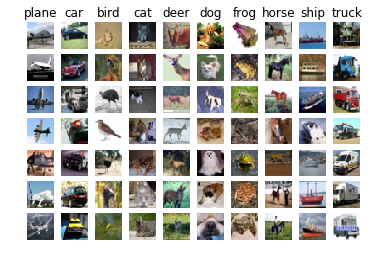

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# visulize
def vis_loss(mod):
    plt.subplot(2, 1, 1)
    plt.plot(mod.loss_history, 'o')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(mod.train_acc_history, '-o')
    plt.plot(mod.val_acc_history, '-o')
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

In [6]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [7]:
# toy dataset test
np.random.seed(231)

num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

layers = [Conv(name="conv1", filter=8, kernel_size=3, stride=2, pad=3),
          ReLU(name="relu1"),
         Pool(name="pool1", pool_height=2, pool_width=2, stride=2),
#           Conv(name="conv2", filter=2, kernel_size=3, stride=2, pad=3),
#           ReLU(name="relu2"),
#          Pool(name="pool2", pool_height=2, pool_width=2, stride=2),
         Linear(name="fc1", output_shape=32),
          ReLU(name="relu2"),
          Linear(name="fc2", output_shape=10)]

small_net = net(layers, softmax_loss, 0.01)

mod = model(small_net, small_data,
                num_epochs=100, batch_size=50,
                update_rule='sgd',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=1)
mod.warmup()
mod.train()

(Iteration 1 / 200) loss: 3.726614
(Epoch 0 / 100) train acc: 0.120000; val_acc: 0.108000
(Iteration 2 / 200) loss: 3.591699
(Epoch 1 / 100) train acc: 0.140000; val_acc: 0.105000
(Iteration 3 / 200) loss: 3.314616
(Iteration 4 / 200) loss: 3.183244
(Epoch 2 / 100) train acc: 0.160000; val_acc: 0.116000
(Iteration 5 / 200) loss: 3.065041
(Iteration 6 / 200) loss: 3.356896
(Epoch 3 / 100) train acc: 0.190000; val_acc: 0.125000
(Iteration 7 / 200) loss: 3.045229
(Iteration 8 / 200) loss: 2.902715
(Epoch 4 / 100) train acc: 0.180000; val_acc: 0.114000
(Iteration 9 / 200) loss: 2.688209
(Iteration 10 / 200) loss: 2.733444
(Epoch 5 / 100) train acc: 0.170000; val_acc: 0.109000
(Iteration 11 / 200) loss: 2.595439
(Iteration 12 / 200) loss: 2.601695
(Epoch 6 / 100) train acc: 0.220000; val_acc: 0.121000
(Iteration 13 / 200) loss: 2.328811
(Iteration 14 / 200) loss: 2.786902
(Epoch 7 / 100) train acc: 0.270000; val_acc: 0.114000
(Iteration 15 / 200) loss: 2.779875
(Iteration 16 / 200) loss: 2.

(Epoch 64 / 100) train acc: 0.780000; val_acc: 0.162000
(Iteration 129 / 200) loss: 0.957109
(Iteration 130 / 200) loss: 1.200007
(Epoch 65 / 100) train acc: 0.770000; val_acc: 0.164000
(Iteration 131 / 200) loss: 1.102635
(Iteration 132 / 200) loss: 0.998292
(Epoch 66 / 100) train acc: 0.780000; val_acc: 0.156000
(Iteration 133 / 200) loss: 1.122079
(Iteration 134 / 200) loss: 1.071200
(Epoch 67 / 100) train acc: 0.780000; val_acc: 0.151000
(Iteration 135 / 200) loss: 1.069877
(Iteration 136 / 200) loss: 1.018239
(Epoch 68 / 100) train acc: 0.790000; val_acc: 0.163000
(Iteration 137 / 200) loss: 0.966588
(Iteration 138 / 200) loss: 1.246747
(Epoch 69 / 100) train acc: 0.790000; val_acc: 0.169000
(Iteration 139 / 200) loss: 1.307669
(Iteration 140 / 200) loss: 1.089398
(Epoch 70 / 100) train acc: 0.810000; val_acc: 0.161000
(Iteration 141 / 200) loss: 1.009030
(Iteration 142 / 200) loss: 1.056524
(Epoch 71 / 100) train acc: 0.800000; val_acc: 0.160000
(Iteration 143 / 200) loss: 0.9145

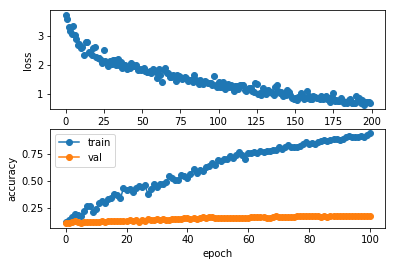

In [8]:
vis_loss(mod)